<a href="https://colab.research.google.com/github/098Steve/Jupyter/blob/main/RegressionWithNeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploring Regression**

# Simple Linear Regression - Calculating a line of Best Fit

There are various forms of regression.  One popular form is where a linear relationship is sought between independent variable(s) and a dependent variable. For simple linear regression, where there is one indpendent variable and one dependent variable, the method of least squares is used to calculate regresssion or a line of best fit.  Usually you do not need to worry about the formula. ML or statistical tools will do it for you.  However in this exercise we do it step by step  to learn about the mathematics behind the method.


**Task 1 - Doing it by Hand and Understanding the Maths**

**The Maths**

Linear regression involves finding a linear equation for the predicted value ̂Y of the form:
    ̂Y = W𝜯X + b


where X = {x1, x2, .....xn} and the n input variables

and W = {w1, w2,......wn} are the linear coefficients

and b is the bias term

For simple linear regression with one independent value and one dependent value this boils down to the equation for a straight line:
  y= mx +c

The bias term allows provides an output even in the absense of any input; and an option to shift our data for a better fit.

The error between observed values (Y) and predicted values (̂Y) for an input sample i is:

      ei = Yi - ̂Y

̂Y is sometimes written Yhat

To model a relationship we want to minimise the error between the true value (Y) and the hypothesised value of the model (Y ).  We use the method of least squares.  We try to minimise the sum of squares, the square being  the square of the error value for each observation and the sum being all the error values added.  The sum of the squares expression becomes:

  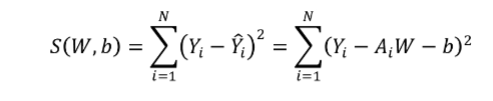


We want to estimate the regression coefficients W and b such that S is minimised.  The derivative of a function is 0 at its minimum so we get the following equations:

  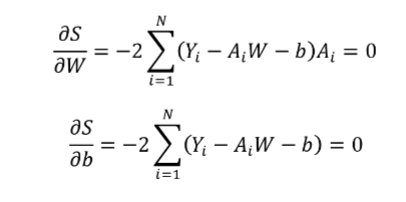

The derivation equations can be solved to find the two unknowns.



First expand the summation in the second equation:

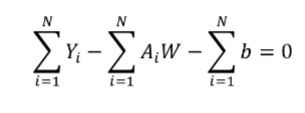


The last term sums up to a constant N.  Thus we can rewrite as:

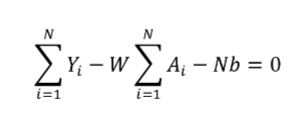

Reordering the terms, we get:


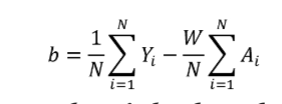


The two terms on the right can be replaced by ̄Y (Ybar) and ̄A(Abar)respectively. A bar above a variable means average. So we end up with:

    b = ̄Y - W A

In a similar fashion we expand the other derivation function (the partial differential of S with respect to W)

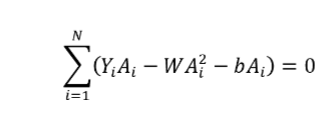

Substitue the expression for the bias term b:

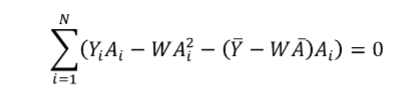

Reorder the expression:

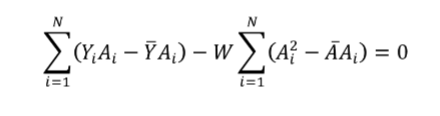

Doing some more substitution and shifting, we get:

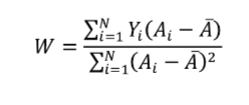


The above equation minimises the sum of the squares of the error values so we can use it to work out the equation of the line of best fit given two data sets Y and A where we are trying to find a relationship.

The following code shows an example.  The example iis about house prices. Y is the house price and A is the area (size of the house).

**Simple Linear Regression for House Price Prediction based on Area**

In [ ]:
#First load the libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#Nextgenerate random data with a linear relationship.  To make it more realistic, we also add a random noise element
#Generate random data
np.random.seed(0)
area = 2.5* np.random.randn(100) +25
price = 25* area + 5+ np.random.randint (20,50, size = len(area))
data = np.array([area, price])
data = pd.DataFrame (data = data.T, columns = ['area', 'price'])
plt.scatter (data['area'], data['price'])
plt.show()


Now, we calculate the two regression coefficients using the equations we defined.  You can see the result is very much near the linear relationship we have simulated

In [ ]:
W = sum(price*(area - np.mean(area))) / sum((area - np.mean(area))**2)


In [ ]:
b = np.mean(price) - W*np.mean(area)
print("The regression coefficients are", W, b)

Let us now try predicting the new prices using the obtained weight and bias values:

In [ ]:
y_pred = W * area + b


Next we plot the predicted prices along with the actual price.  You can see that predicted prices follow a linear relationship wuth the area.

In [ ]:
plt.plot(area, y_pred, color = 'red', label = "Predicted Price")
plt.scatter (data['area'], data['price'], label = "Training Data")
plt.xlabel("Area")
plt.ylabel("Price")
plt.legend()

**Multiple Linear Regression**

In most problems, the dependent variables depend upon multiple independent variables. Multiple linear regression finds a linear relationship between the many independent input variables (X) and the dependent output variable (Y), such that they satisfy the predicted Y value of the form.

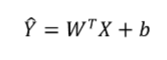

where  X= {x1, x2, ....,xn} are the n independent input variables, and W= {w1, w2, .....,wn} are the linear coefficients, with b as the bias term.


As before, the linear coefficients Ws are estimated using the method of least squares, that is, minimising the sum of squared differences between predict values (Yhat) and observed values (Y). Thus, we try to minimise the loss function (also called squared error, and if we divide by n, it is the mean squared error):

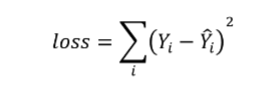

where the sum is over all training samples.




---



---



As you might have guessed, now, instead of two, we will have n+1 equations, which we will need to simultaneously solve.  An easier alternative will be to use the TensorFlow Keras API.

**Multivariate Linear Regression**

There can be cases where the independent variables affect more than on dependent variable.  This is a case of multivariate linear regression.  Mathematically, a multivariate regression model can be represented as:


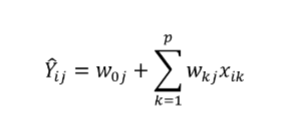

where i ∈ [1,....,n] and j ∈ [1,.....,m]. The term ̂Yᵢⱼ represents the jth predicted output value corresponding to th ith input sample, w represents the regression coefficients, and xᵢₖ is the kth feature of the ith input sample. The number of equations needed to solve in this case will be n x m.
While we can solve these equations using matrices, the process will be computationally expensive as it will involve calculating the inverse and determinants.  An easier way would be to use gradient descent with the sum of least square error as the loss function and to use one of the many optimisers that the TensorFlow API includes.







**Task 2 - Using Neural Networks for Simple  and Complex Linear regression**

**Neural Networks for Linear Regression**

Let's use a neural network to perform the task of regression. A neural network is a generalised regressor as each of the nodes evaluates a linear expression and then activates to provide an output.

**Simple Linear Regression using TensorFlow Keras**

We will use the house and price example.

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import tensorflow.keras as K
#from tensorflow.keras.layers import Dense

In [ ]:

#Generate the data
np.random.seed(0)
area = 2.5* np.random.randn(100) +25
price = 25* area + 5+ np.random.randint (20,50, size = len(area))
data = np.array([area, price])
data = pd.DataFrame (data = data.T, columns = ['area', 'price'])
plt.scatter (data['area'], data['price'])
plt.show()

The input to the neural networks should be normalised; this is because the input gets multiplied  with weights, and if we have very large numbers, the result of multiplication will be very large, and soon our metrics may cross infinity  (the largest number your computer can handle)

In [ ]:
#Normalise
data = (data - data.min()) / (data.max() - data.min())

In [ ]:
#Build a model
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(1, input_shape= [1,], activation= None))
model.summary()



In [ ]:
#Compile the model
model.compile(loss='mean_squared_error', optimizer ='sgd')

In [ ]:
#Train the model
model.fit (x= data['area'], y= data['price'], epochs = 400, batch_size=32, verbose =1, validation_split = 0.2)

In [ ]:
#Predict value
y_pred = model.predict(data['area'])
y_pred

In [ ]:
#Plot a graph of the predicted and the actual data
plt.plot(data['area'], y_pred, color='red', label = "Predicted Price")
plt.scatter(data['area'], data['price'], label ="Training Data")
plt.xlabel ("Area")
plt.ylabel("Price")
plt.legend()

We can use model.layers.get_weights to find the coefficients W and b of the model.

In [ ]:

model.layers[0].get_weights()

What coefficients have been generated by the neural network?

Why might these change each run?

How do they compare to the mathematical coefficients generated previously?

**Multiple and Multivariate Linear Regression**

These types of regressions have multiple independent variables and in the case of multivariate regression, multiple dependent variables too.  They therefore involve solving multiple equations.  We can build a deep neural network for this.  A deep neural network is one that has more than one layer. Dependent and independent variables may be related in a non-linear way so we will need to use a non-linear activation function.

**MPG Data Set**

We will build a deep neural network to predict the fuel efficiency of a car, given its number of cylinders, displacement, accereration and so on.  The data is available from the UCI ML repository.

https://archive.ics.uci.edu/


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [ ]:
#download data from UCI ML repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names =['mpg', 'cylinders', 'displacement',  'horsepower', 'weight', 'acceleration', 'model_year', 'origin']
auto_data = pd.read_csv (url, names=column_names, na_values='?', comment='\t', sep =' ', skipinitialspace=True)

In [ ]:
type(auto_data)


In [ ]:
auto_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [ ]:
#Drop 'origin' as we will not use it
#Drop any row with NAN values
auto_data = auto_data.drop(['origin'],axis=1)
print(auto_data.isna().sum())
auto_data = auto_data.dropna()

In [ ]:
type(auto_data)

In [ ]:
#Divide the dataset into training and test
train_dataset = auto_data.sample(frac=0.8, random_state =0)
test_dataset = auto_data.drop(train_dataset.index)

In [ ]:
#Take a glance at the Train data
train_dataset.head()

In [ ]:
#Take a glance at the Test data
test_dataset.head()

In [ ]:
# Use Seaborn's pairplot to visualise the relationship between the different variables
sns.pairplot(train_dataset[['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year']], diag_kind ='kde')

We can see that mpg (fuel efficiency) has dependencies on all the other variables, and the dependency relationship is non-linear, as none of the curves are linear

In [ ]:
#Separate the variables into input variables and the label that we want to predict

train_features = train_dataset.copy()
test_features = test_dataset.copy()
train_labels = train_features.pop('mpg')
test_labels = test_features.pop('mpg')

In [ ]:
#Normalise the data
data_normalizer = keras.layers.Normalization(axis=[1,])
data_normalizer.adapt(np.array(train_features))
train_features = data_normalizer(train_features)
data_normalizer.adapt(np.array(test_features))
test_features = data_normalizer(test_features)


In [ ]:
#Build a model
model = tf.keras.models.Sequential()
model.add(keras.layers.LayerNormalization(axis=1))
model.add(keras.layers.Dense(64, input_shape = (None,6),activation= 'relu'))
model.add(keras.layers.Dense(32, activation= 'relu'))
model.add(keras.layers.Dense(1, activation= None))
model.summary()




In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model for 100 epochs
history= model.fit(x=train_features, y=train_labels, epochs = 100, verbose =1, validation_split=0.2)

In [ ]:
#Let's plot the history
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error[MPG]')
plt.legend()
plt.grid(True)

In [ ]:
#Compare the predicted fuel efficiency and the true fuel efficiency on the test dataset
y_pred= model.predict(test_features).flatten()
a = plt.axes(aspect='equal')
plt.scatter(test_labels, y_pred)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims=[0,50]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims,lims)
plt.show()